In [1]:

!apt-get install -y fonts-nanum > /dev/null
!sudo fc-cache -fv > /dev/null
!rm ~/.cache/matplotlib -rf > /dev/null


In [2]:
!pip install Konlpy > /dev/null

In [2]:
from google.colab import files
uploaded = files.upload()
textfile = list(uploaded.keys())[0]

Saving netflix_blog.txt to netflix_blog.txt


In [75]:
uploaded = files.upload()
maskfile = list(uploaded.keys())[0]

Saving netflix.png to netflix.png


In [76]:
with open(textfile) as fp:
    text = fp.read()

In [77]:
from konlpy.tag import Okt
okt = Okt()

In [78]:
tokens = okt.nouns(text)
tokens[:10]

['넷플릭스', '미드', '추천', '추천', '이', '외', '김씨', '편의점', '루시퍼', '블랙']

In [79]:
# 영문자, 숫자 제거
import re
new_tokens = []
for token in tokens:
    item = re.sub('[A-Za-z0-9]', '', token)   # \w
    if item:
      new_tokens.append(item)

In [80]:
# 한글 폰트 사용
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rcParams['axes.unicode_minus'] = False
plt.rc('font', family='NanumBarunGothic')

In [81]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

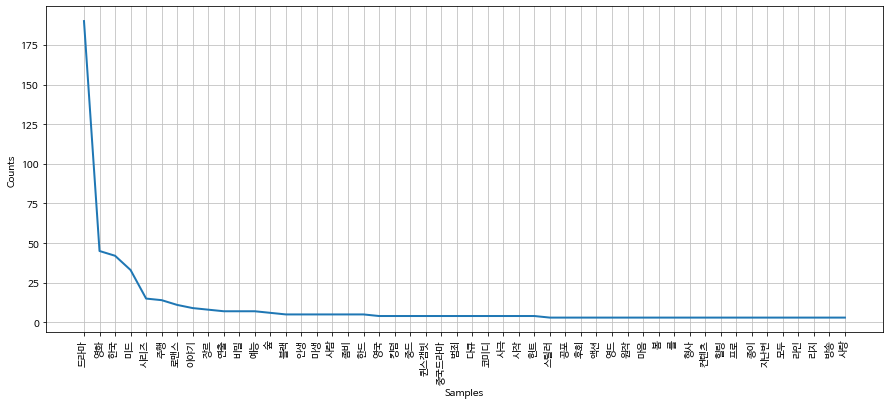

In [133]:
netflix = nltk.Text(new_tokens, name='넷플릭스추천')
plt.figure(figsize=(15,6))
netflix.plot(50)
plt.show()

In [134]:
stoptext = """
      넷플릭스 추천 전 작품 시즌 저 오늘 볼 것 요즘 중 정 더 집 펀 개 보기 이 안 내 보고 좀 외 분 작 거 다시 제 정도
      등등 글 인기 펀 최근 가지 시간 앤 뭐 은 위주 하나 소개 공유 생각 수 동 출처 다음 때 나 그 걸 해 눈 요 포스팅
      동 기준 매력 집콕 주말 한번 영상 일단 정말 이후 또 보시 때문 순위 출연 리스트 편 펀 주인공 코로나 스토리 위 최신
      ㅗ 혹시 번 여러분 도 각 금 진짜 작년 날 추가 즐 스포 날 초 가끔 방학 현재 등 꼭 일상 시청  베스트
      못 이미지 프로그램 무 결산 넷플 이번 꼽는 몇 영화' 참고 스타트 건가 드릴 고민 안보 보신 어디 추 부시
      넷플릭스 보고 외 편 좀 이 시 서 보신 그냥 결산 무 위 정도 해 꼭 것 거의 등등 수 각 가장 
      도움 클릭 별로 어제 주변 직접 국내 거나 약간 앞 그간 나름 겨우 재미 취향
      총 모어 건 드 월 
"""
stop_words = stoptext.split()
new_tokens = [word for word in new_tokens if word not in stop_words]
new_tokens[:10]

['미드', '김씨', '편의점', '루시퍼', '블랙', '미러', '드라마', '영화', '검블유', '클래식']

In [135]:
from wordcloud import WordCloud
from PIL import Image

In [136]:
data = netflix.vocab().most_common(300)

In [137]:
path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
wc = WordCloud(
      font_path=path, relative_scaling=0.2, 
      background_color='white'
).generate_from_frequencies(dict(data))

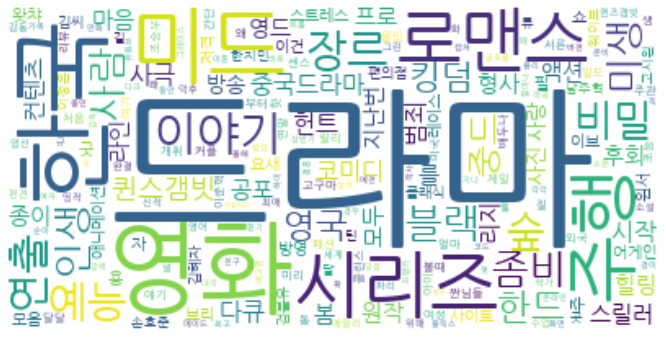

In [138]:
plt.figure(figsize=(12,6))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [139]:
mask = np.array(Image.open(maskfile))

from wordcloud import ImageColorGenerator
image_colors = ImageColorGenerator(mask)


In [140]:
wc = WordCloud(
      font_path=path, relative_scaling=0.2, 
      background_color='white', mask=mask,
      min_font_size=1, max_font_size=120
).generate_from_frequencies(dict(data))

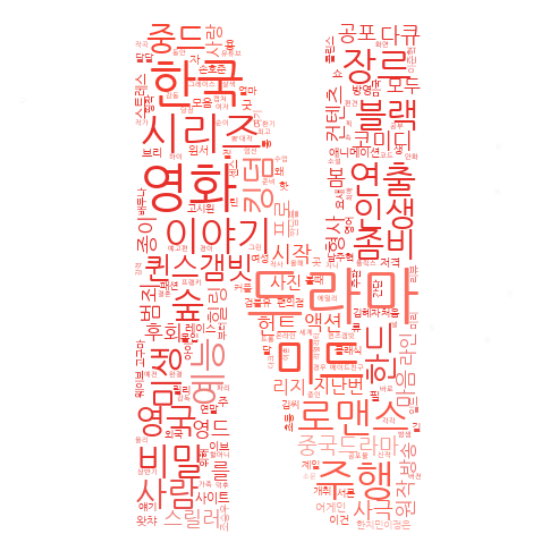

In [141]:
plt.figure(figsize=(10,10))
plt.imshow(wc.recolor(color_func=image_colors), interpolation='bilinear')
plt.axis('off')
plt.show()

In [141]:
driver.close()